In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.stats.weightstats import ztest

In [3]:
data = pd.read_csv (r'C:\Users\ADAM\Downloads\Add_sales_data_2018.csv')
df = pd.DataFrame(data, columns= ['Date','Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)','Profit(in Thousands)'])
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [10]:
df['Total Add Cost']=df['Add1(in Thousands)']+df['Add2(in Thousands)']+df['Add3(in Thousands)']+df['Add4(in Thousands)']+df['Add5(in Thousands)']
df['Total AddCost Avg']=(df['Add1(in Thousands)']+df['Add2(in Thousands)']+df['Add3(in Thousands)']+df['Add4(in Thousands)']+df['Add5(in Thousands)'])/5

In [11]:
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands),Total Add Cost,Total AddCost Avg
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065,1068.25,213.65
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448,1060.95,212.19
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819,1102.90,220.58
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665,1147.30,229.46
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683,1151.40,230.28
...,...,...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105,1424.25,284.85
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655,1433.95,286.79
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013,1459.10,291.82
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444,1471.65,294.33


1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [12]:
r = np.corrcoef(df['Total Add Cost'], df['Profit(in Thousands)'])
r

array([[1.       , 0.9990536],
       [0.9990536, 1.       ]])

very srtong corelation

2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [13]:
from sklearn.linear_model import LinearRegression

In [19]:
x=df['Total Add Cost'].to_numpy()
x=x.reshape(-1,1)
y=df['Profit(in Thousands)'].to_numpy()
y=y.reshape(-1,1)

In [20]:
linereg = LinearRegression()

In [21]:
linereg.fit(x,y)

LinearRegression()

In [22]:
y_predict =linereg.predict(x)

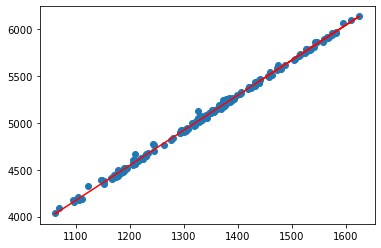

In [23]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='red')
plt.show()

In [40]:
print(linereg.coef_)
m=linereg.coef_[0][0]

[[3.73922324]]


In [41]:
print(linereg.intercept_)
c=linereg.intercept_[0]

[61.53273499]


3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [44]:
new_x =290+312+309+298+320
new_x

1529

In [54]:
new_y=m*new_x+c
new_y

5778.805072391362

Predicted profit generated by the company for given add cost is 5778.805072391362